# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.275676e+01     7.118095e+00
 * time: 0.004518032073974609
     1     2.724295e+01     4.890486e+00
 * time: 0.013208866119384766
     2     2.167233e+01     6.450259e+00
 * time: 0.033349037170410156
     3     1.284832e+01     1.755352e+00
 * time: 0.057054996490478516
     4     1.187114e+01     2.984654e+00
 * time: 0.07306289672851562
     5     1.133492e+01     1.589258e+00
 * time: 0.08923101425170898
     6     1.030110e+01     1.466130e+00
 * time: 0.1050870418548584
     7     9.637918e+00     1.120896e+00
 * time: 0.12105202674865723
     8     9.332803e+00     9.224110e-01
 * time: 0.13711905479431152
     9     9.309879e+00     1.265860e+00
 * time: 0.14926886558532715
    10     9.214328e+00     1.073995e+00
 * time: 0.16533684730529785
    11     9.186170e+00     8.237084e-01
 * time: 0.17739582061767578
    12     9.134609e+00     6.536886e-01
 * time: 0.18947792053222656
    13     9.076631e+00     4.686094e-01
 * ti

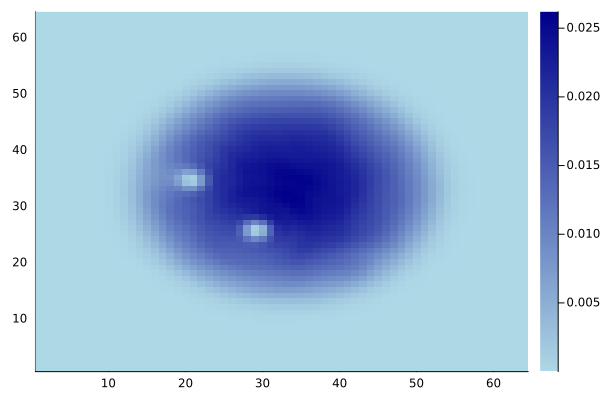

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)